In [1]:
import math
import numpy as np
from PIL import Image

from platform import python_version 
print(python_version())



3.7.15


In [161]:
pyenv install 3.9.1

SyntaxError: invalid syntax (1150837578.py, line 1)

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 15 08:53:52 2023

@author: Milosh Yokich
"""
from PIL import Image
import numpy as np

import gc



img_path = "C:/Users/milos/Desktop/PSML2023/01.png"

img =  Image.open(img_path)

pic = np.array(img)
del img
gc.collect()
temp = np.array(pic[:, :, 0])


r = pic[:, :, 0] == 255
g = pic[:, :, 1] == 0
b = pic[:, :, 2] == 0
temp[r & g & b] = 1
temp[~(r & g & b)] = 0
R = np.sum(temp)

r = pic[:, :, 0] == 0
g = pic[:, :, 1] == 0
b = pic[:, :, 2] == 255
temp[r & g & b] = 1
temp[~(r & g & b)] = 0
B = np.sum(temp)


r = pic[:, :, 0] == 0
g = pic[:, :, 1] == 255
b = pic[:, :, 2] == 0
temp[r & g & b] = 1
temp[~(r & g & b)] = 0
G = np.sum(temp)


r = pic[:, :, 0] == 255
g = pic[:, :, 1] == 255
b = pic[:, :, 2] == 0

temp[r & g & b] = 1
temp[~(r & g & b)] = 0

Y = np.sum(temp)
#plt.imshow(temp)

r = pic[:, :, 0] == 0
g = pic[:, :, 1] == 0
b = pic[:, :, 2] == 0
temp[r & g & b] = 1
temp[~(r & g & b)] = 0

K = np.sum(temp)

del temp
gc.collect()

   
#plt.imshow(temp)

from collections import defaultdict



ROW = 768 
COL = 768 
visited = [[0] * COL for i in range(ROW)]

for i in range(0, 768):
    for j in range(0, 768):
        visited[i][j] = False
        if pic[i, j, 0] == 255 and pic[i, j, 1] == 255 and pic[i, j, 2] == 255:
            visited[i][j] = True

                
        
        



        
def canVisit(pic, row, col, visited, colour):
    global ROW, COL
    
    if colour == 0:
        return ((row >= 0) and (row < ROW) and (col >= 0) and (col < COL) 
               and (pic[row, col, 0] == 255 and not visited[row][col] and
               pic[row, col, 1] == 0 and pic[row, col, 2] == 0))
    
    if colour == 1:
        return ((row >= 0) and (row < ROW) and (col >= 0) and (col < COL) 
               and (pic[row, col, 1] == 255 and not visited[row][col])  and
               pic[row, col, 0] == 0 and pic[row, col, 2] == 0)
    
    if colour == 2:
        return ((row >= 0) and (row < ROW) and (col >= 0) and (col < COL) 
               and (pic[row, col, 2] == 255 and not visited[row][col])  and
               pic[row, col, 1] == 0 and pic[row, col, 0] == 0)
    if colour == 3:
        return ((row >= 0) and (row < ROW) and (col >= 0) and (col < COL) 
               and (pic[row, col, 0] == 255 and not visited[row][col]) and
               pic[row, col, 1] == 255 and pic[row, col, 2] == 0)
    if colour == 4:
        return ((row >= 0) and (row < ROW) and (col >= 0) and (col < COL) 
               and (pic[row, col, 0] == 0 and not visited[row][col])  and
               pic[row, col, 1] == 0 and pic[row, col, 2] == 0)
    
def canVisitBL(pic, row, col, visited):
    global ROW, COL
    
    return ((row >= 0) and (row < ROW) and (col >= 0) and (col < COL) 
                and not visited[row][col] )
                
    
def check_colour(row, col, pic):
            if (pic[row, col, 0] == 255  and
                   pic[row, col, 1] == 0 and pic[row, col, 2] == 0):

                return 0


            if (pic[row, col, 1] == 255  and
                   pic[row, col, 0] == 0 and pic[row, col, 2] == 0):

                return 1
        
 
            if ((pic[row, col, 2] == 255) and (pic[row, col, 1] == 0) and (pic[row, col, 0] == 0)):


                return 2


            if (pic[row, col, 0] == 255  and
                   pic[row, col, 1] == 255 and pic[row, col, 2] == 0):

                return 3

            if (pic[row, col, 0] == 0  and
                   pic[row, col, 1] == 0 and pic[row, col, 2] == 0):

                return 4
            if (pic[row, col, 0] == 255  and
                   pic[row, col, 1] == 255 and pic[row, col, 2] == 255):

                return -1


    

    
def DFS(pic, row, col, visited, colour, count,first, last, blocked, valid):
    rowN = [-1, 0, 1, 0, 1, -1, 1, -1]
    colN = [0, -1, 0, 1, 1, -1, -1, 1]
    
    colW = [-2, 2,  2, -2, -2, -2, -2, -1, 0,  1,  2, 2, 2, 1, 0, -1]
    rowW = [-2, 2, -2,  2,  1,  0, -1, -2,-2, -2, -1, 0, 1, 2, 2,  2]
    
    visited[row][col]  = True
    count[0] += 1
    count[1] += row
    count[2] += col
    last[0] = (row, col)
    flag = True
    c1 = colour
    
    
    if blocked[0] > 2:
        #count[0] = -1
        last[0] = (row, col)
        return
    
    for k in range(8):
        if((row + rowN[k]>= 0) and (row + rowN[k]< ROW) and (col + colN[k]>= 0) and (col + colN[k]< COL)):
            c2 = check_colour(row + rowN[k], col + colN[k], pic)
            if c1 == 2 and c2 == 3:
                continue
            if c1 == 4 and c2 == 1:
                continue
            if c1 == 1 and c2 == 0:
                continue
            if c1 == 4 and c2 == 3:
                continue
                
            if c1 == 3 and c2 == 2:
                continue
            if c1 == 1 and c2 == 4:
                continue
            if c1 == 0 and c2 ==1:
                continue
            if c1 == 3 and c2 == 4:
                continue
            if c2 == -1:
                continue
            if c1 == c2:
                continue

            valid[0]=False
    
    
    for k in range(8):
        if(canVisit(pic, row + rowN[k],
                     col + colN[k], visited, colour)):
            blocked[0] = 0
            flag = False
            DFS(pic, row + rowN[k],
                     col + colN[k],visited,colour, count,first, last, blocked, valid)
            return
            
    for k in range(16):
        if(canVisit(pic, row + rowW[k],
                     col + colW[k], visited, colour) and flag):
            
            flag = False
            DFS(pic, row + rowW[k],
                     col + colW[k],visited,colour, count,first, last, blocked, valid)
            return
            
            
            
        
def check_if_circle(center, r, first, last, colour, pic):
    if (np.abs(first[0]-last[0])+np.abs(first[1]-last[1])>5):
        return False
    
    if (r < 10):
        return False
    
    return (check_surrounding((center[0], center[1] + r), colour, pic) and check_surrounding((center[0] + r, center[1]), colour, pic))
    
def check_surrounding(point, colour, pic):
    x = point[0]
    y = point[1]
    c1 = False
    c2 = False
    c3 = False
    c4 = False
    c5 = False
            
    for row in range(-2, 2):
        for col in range(-2, 2):
            
            if colour == 0:
                c1 = (pic[x + row, y+col, 0] == 255 and
                       pic[x+row, y+col, 1] == 0 and pic[x + row, y+col, 2] == 0)
                if c1:
                    return c1
                continue

            if colour == 1:
                c2 = (pic[x + row, y+col, 1] == 255 and
                       pic[x + row, y+col, 0] == 0 and pic[x + row, y+col, 2] == 0)
                if c2:
                    return c2
                continue

            if colour == 2:
                c3 = (pic[x + row, y+col, 2] == 255  and
                       pic[x + row, y+col, 1] == 0 and pic[x + row, y+col, 0] == 0)
                if c3:
                    return c3
                continue
            if colour == 3:
                c4 = (pic[x + row, y+col, 0] == 255 and
                       pic[x + row, y+col, 1] == 255 and pic[x + row, y+col, 2] == 0)
                #print(c3)
                if c4:
                    return c4
                continue
            if colour == 4:
                c5 = (pic[x + row, y+col, 0] == 0 and
                       pic[x + row, y+col, 1] == 0 and pic[x + row, y+col, 2] == 0)
                if c5:
                    return c5
                continue
    
    
    return False
            
#colour = [code, loc]  - code ---> r/g/b 0/1/2 , y == 4, k == 5     
def sweep(pic,visited, row, col, colour):
    global ROW, COL
    x = row
    y = col
    valid=[True]
    count = [0, 0, 0]
    count[0] = 0
    count[1] = 0
    count[2] = 0
    blocked = 0
    x_avg = 0
    y_avg = 0
    last = [0]
    first = (x, y)
    last[0] = (-1, -1)
    blocked =[0]
    blocked[0] = 0

    DFS(pic, row, col, visited, colour, count,first, last, blocked, valid)
    
    if count[0]:
        #print(count)
        x_avg = round(count[1]/count[0])
        y_avg = round(count[2]/count[0])
    r = round(np.sqrt(((x-x_avg)**2 + (y - y_avg)**2)))
    
    center = (x_avg, y_avg) 
    
    if not valid[0]:
        #print(center, "NOT VALID")
        return False
    if not check_if_circle(center, r, first, last[0], colour, pic):
        #print(center, "NOT CIRCLE")
        return False
    
    

    return (center, r)


ROW = 768 - 
COL = 768
circ_dict = defaultdict()
visited_circ = defaultdict()
graph = defaultdict()
for row in range(0, 768):
    for col in range(0, 768):
        if(not visited[row][col] ):
           
         
            if (pic[row, col, 0] == 255  and
                   pic[row, col, 1] == 0 and pic[row, col, 2] == 0):

                circ = sweep(pic,visited, row, col, 0)
                if circ:
                    circ_dict[circ] = (circ, 'R')
                    visited_circ[circ] = False
                
                
                continue


            if (pic[row, col, 1] == 255  and
                   pic[row, col, 0] == 0 and pic[row, col, 2] == 0):

                circ = sweep(pic,visited, row, col, 1)
                if circ:
                    circ_dict[circ] = (circ, 'G')
                    visited_circ[circ] = False

                continue
        
 
            if ((pic[row, col, 2] == 255) and (pic[row, col, 1] == 0) and (pic[row, col, 0] == 0)):


                circ = sweep(pic,visited, row, col, 2)
                if circ:
                    circ_dict[circ] = (circ, 'B')
                    visited_circ[circ] = False

                continue


            if (pic[row, col, 0] == 255  and
                   pic[row, col, 1] == 255 and pic[row, col, 2] == 0):

                circ = sweep(pic,visited, row, col, 3)
                if circ:
                    circ_dict[circ] = (circ, 'Y')
                    visited_circ[circ] = False

                continue

            if (pic[row, col, 0] == 0  and
                   pic[row, col, 1] == 0 and pic[row, col, 2] == 0):

                circ = sweep(pic,visited, row, col, 4)
                if circ:
                    circ_dict[circ] = (circ, 'K')
                    visited_circ[circ] = False
                continue


del visited

gc.collect()

def does_intersect(circ1, circ2):
    return (circ1[0][0] - circ2[0][0])**2 + (circ1[0][1] - circ2[0][1])**2 < (circ1[1] + circ2[1])**2


def valid_ring(circ1, circ2, circ_dirct):
    c1 = circ_dirct[circ1][1]
    c2 = circ_dirct[circ2][1]
    
    if c1 == 'B' and c2 == 'Y':
        return True
    if c1 == 'K' and c2 == 'G':
        return True
    if c1 == 'G' and c2 =='R':
        return True
    if c1 == 'K' and c2 == 'Y':
        return True
    if c1 == 'Y' and c2 == 'B':
        return True
    if c1 == 'G' and c2 == 'K':
        return True
    if c1 == 'R' and c2 =='G':
        return True
    if c1 == 'Y' and c2 == 'K':
        return True
    return False
    
keys = circ_dict.keys()

if(not keys):
    print('Y', Y)
    print('B', B)
    print('K', K)
    print('G', G)
    print('R', R)
    print(0)
else:
    circ1 = list(keys)[0]
    found_inters = False
    graphs = []
    count = 0
    over = False
    more = 0

    good_one = True

    #print(keys)
    for circ2 in keys:
        if  visited_circ[circ2]:
            continue
        if circ_dict[circ2][1] == 'R':
            circ1 = circ2
            good_one = True
            break

    while not over:
        #print(circ1)
        visited_circ[circ1] = True

        for circ2 in keys:
            if visited_circ[circ2]:
                continue
            if does_intersect(circ1, circ2):
                graph[circ_dict[circ1][1]] = circ1
                found_inters = True
                good_one = True and valid_ring(circ1, circ2,circ_dict)


                circ1 = circ2

                break

        if not found_inters:
            nodes = graph.keys()
            found_inters = False

            if not nodes:
                old_circ = circ1
                for circ2 in keys:
                    if  visited_circ[circ2]:
                        continue
                    if circ_dict[circ2][1] == 'R':
                        circ1 = circ2
                        good_one = True
                        break
                if old_circ == circ1:
                    over = True            
            else:
                #print(nodes)
                if len(nodes) != 4:
                    old_circ = circ1
                    for circ2 in keys:
                        if  visited_circ[circ2]:
                            continue
                        if circ_dict[circ2][1] == 'R':
                            circ1 = circ2
                            good_one = True
                            break
                    if old_circ == circ1:
                        over = True
                else:

                    if(good_one):
                        #print(circ_dict[circ1][1])
                        graph[circ_dict[circ1][1]] = circ1
                        graphs.append(graph)

                    good_one = True

                    old_circ = circ1
                    for circ2 in keys:
                        if  visited_circ[circ2]:
                            continue
                        if circ_dict[circ2][1] == 'R':
                            circ1 = circ2
                            good_one = True
                            break
                    if old_circ == circ1:
                        over = True

            graph = defaultdict()        

        else:
            found_inters = False


    print('Y', Y)
    print('B', B)
    print('K', K)
    print('G', G)
    print('R', R)
    print(len(graphs))
    for graph in graphs:
        print('Y', graph['Y'][0][1], graph['Y'][0][0])
        print('B', graph['B'][0][1], graph['B'][0][0])
        print('K', graph['K'][0][1], graph['K'][0][0])
        print('G', graph['G'][0][1], graph['G'][0][0])
        print('R', graph['R'][0][1], graph['R'][0][0])
    
        
    
    



Y 680
B 676
K 2052
G 1112
R 753
2
Y 587 371
B 524 449
K 525 294
G 587 217
R 523 142
Y 216 142
B 150 114
K 204 211
G 271 238
R 258 305


True
0


<IPython.core.display.Javascript object>


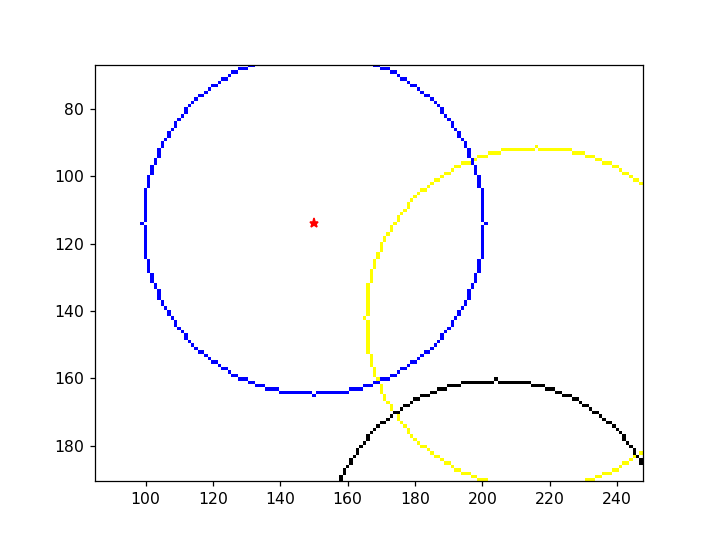

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255   0]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
    0 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255   0
  255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255   0 255
  255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255   0 255 255
  255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255   0 255 255
  255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255   0 255 255 255
  255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255   0 255 255 255 255
  255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255   0 255 255 255 255 255
  255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255   0 255 255 255 255 255
  255 255]
 [255 255 255 255 255 255 255 255 255 255 255   0 255 255 255 255

In [148]:
%matplotlib notebook
print(255 == 255 and 0 == 0 and 0 == 0)

print(pic[21,355, 0])
plt.imshow(pic)
plt.plot(150, 114, 'r*')
plt.plot(499, 345, 'b*')
plt.plot(596, 113, 'k*')
print(pic[170:190, 520:540, 0])
print(pic.shape)
print(385*1.11)

In [ ]:
t = (1, 2)
